# Google圖片搜尋存擋

In [16]:
from bs4 import BeautifulSoup
from selenium import webdriver
import os
import time
import urllib

In [17]:
#在此定義要抓的數量
lim = 20

### 讀取 `./keyword.txt` 之關鍵字加到url

In [18]:
with open ("keyword.txt",mode="r") as f:
    img = f.read().strip('\n')
    print(img)

url='https://www.google.com.tw/search?q='+img+\
'&amp;rlz=1C1CAFB_enTW617TW617&source=lnms&tbm=\
isch&sa=X&ved=0ahUKEwictOnTmYDcAhXGV7wKHX-OApwQ_AUICigB&biw=1128&bih=960'

cat


### 建立路徑名稱

In [19]:
#path create
path = "./%s/"%img

if os.path.exists:
    print("已存在")
else:
    os.makedirs(path)

已存在


### Chrome
* 此舉會開啟chrome，mac及windows都能用

In [20]:
try:
    driver = webdriver.Chrome(executable_path='./chromedriver.exe')
except Exception:
    driver = webdriver.Chrome(executable_path='./chromedriver')

driver.maximize_window()
response = driver.get(url)

### 下捲
* 數量多時截圖會有所限制，因此執行下捲的動作

In [21]:
#定義下捲的幅度
def scroll_down_amp(lim):
    if lim <= 80:
        return 1
    else:
        return lim // 90 +1
print(scroll_down_amp(270))

4


In [22]:
#scroll down & send key
pos = 0
n = 0
for i in range(scroll_down_amp(lim)):
    pos += i*500
    js = 'document.documentElement.scrollTop=%d' % pos
    driver.execute_script(js)
    time.sleep(1)
 
    try:
        driver.find_element_by_xpath("//input[@value='顯示更多結果']").click()
        print("按下顯示結果")

    except Exception:
        pass

### 執行存取url

In [23]:
q = 0
#headers = {'User-Agent': 'Mozilla/5.0'}
soup = BeautifulSoup(driver.page_source, 'html.parser')
items = soup.find_all('img')

for link in items:
    url = link.get('src')
    try:
        filename="%s_%d.jpg"%(img, (q+1))
        q += 1
        urllib.request.urlretrieve(url, os.path.join(path , filename))
        print("第%d張圖已完成"%q)
    except Exception:
        print("第%d張網址無效"%q)
    if q >= lim:
        break

第1張圖已完成
第2張圖已完成
第3張圖已完成
第4張圖已完成
第5張圖已完成
第6張圖已完成
第7張圖已完成
第8張圖已完成
第9張圖已完成
第10張圖已完成
第11張圖已完成
第12張圖已完成
第13張圖已完成
第14張圖已完成
第15張圖已完成
第16張圖已完成
第17張圖已完成
第18張圖已完成
第19張圖已完成
第20張圖已完成


### 圖檔顯示

In [24]:
import glob, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mp

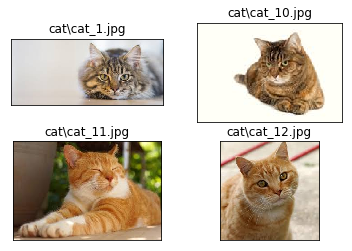

In [25]:
allimg = glob.glob(path+"*.jpg")
i = 0
for image in allimg[:4]:
    n = mp.imread(image)
    filename = image.split('/')[-1]
    plt.subplot(2, 2, i+1),plt.imshow(n),plt.title(filename),plt.xticks([]),plt.yticks([])
    i+=1